In [217]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

data_path = "Resources/COVID_final_data.csv"


data = pd.read_csv(data_path)

data.head()

,Unnamed: 0,Country,Country Code,Cases,Deaths,Deaths per 1000 Cases,Population 2019,"Cases per 100,000 People","Deaths per 100,000 People",2017 GDP in Billions,2018 GDP in Billions,2019 GDP in Billions,Capital,Latitude,Longitude
0,0,Afghanistan,AFG,39616,1470,37.11,38041757.0,104.14,3.86,20.191760,19.484385,19.101354,Kabul,34.5167,69.1833
1,1,Albania,ALB,14730,407,27.63,2862427.0,514.60,14.22,13.019693,15.147021,15.278077,Tirana,41.3275,19.8189
2,2,Algeria,DZA,52520,1779,33.87,43053054.0,121.99,4.13,167.000000,174.000000,170.000000,Algiers,36.7631,3.0506
3,3,Andorra,AND,2568,53,20.64,76177.0,3371.10,69.57,3.000181,3.218316,3.154058,Andorra la Vella,42.5,1.5165
4,4,Angola,AGO,5725,211,36.86,31825299.0,17.99,0.66,122.000000,101.000000,94.635416,Luanda,-8.8383,13.2344


In [218]:
clean dataframe
find min, max, median pop
bin and cut


SyntaxError: invalid syntax (<ipython-input-218-57366b006cd3>, line 1)

In [219]:
subset = data[['Country', 'Cases', 'Deaths', 'Deaths per 1000 Cases', 'Population 2019', 'Latitude']]
subset.head()

,Country,Cases,Deaths,Deaths per 1000 Cases,Population 2019,Latitude
0,Afghanistan,39616,1470,37.11,38041757.0,34.5167
1,Albania,14730,407,27.63,2862427.0,41.3275
2,Algeria,52520,1779,33.87,43053054.0,36.7631
3,Andorra,2568,53,20.64,76177.0,42.5
4,Angola,5725,211,36.86,31825299.0,-8.8383


In [220]:
bins = [0, 109999, 799999, 2399999, 4949999, 8499999, 11499999, 18999999, 34999999, 79999999, 1500000000]
pop_ranges = ['<110k', '110k-799999','800k-2399999', '2.4m-4949999', '4.95m-8499999', '8.5m-11499999', '11.5m-18999999', '20m-34999999', '35m-79999999', '70m-1.5b']
subset['Population Range'] = pd.cut(subset['Population 2019'], bins, labels=pop_ranges, include_lowest=True)

C:\Users\Adam\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [221]:
subset.head()

,Country,Cases,Deaths,Deaths per 1000 Cases,Population 2019,Latitude,Population Range
0,Afghanistan,39616,1470,37.11,38041757.0,34.5167,35m-79999999
1,Albania,14730,407,27.63,2862427.0,41.3275,2.4m-4949999
2,Algeria,52520,1779,33.87,43053054.0,36.7631,35m-79999999
3,Andorra,2568,53,20.64,76177.0,42.5,<110k
4,Angola,5725,211,36.86,31825299.0,-8.8383,20m-34999999


In [222]:
subset['Population Range'].value_counts()

2.4m-4949999      21
110k-799999       21
35m-79999999      20
8.5m-11499999     20
4.95m-8499999     20
800k-2399999      20
<110k             20
70m-1.5b          19
20m-34999999      19
11.5m-18999999    19
Name: Population Range, dtype: int64

In [247]:
pop_range = '2.4m-4949999'
group = subset.loc[(subset['Population Range'] == f'{pop_range}')]
group_lat = group['Latitude']
group_cases = group['Cases']
group_deaths = group['Deaths']
group_dp1k = group['Deaths per 1000 Cases']

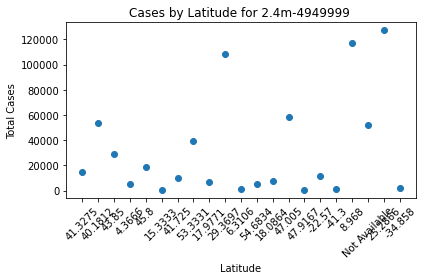

In [248]:
plt.scatter(group_lat, group_cases)
plt.xlabel('Latitude')
plt.ylabel('Total Cases')
plt.title(f'Cases by Latitude for {pop_range} ')
#plt.xlim(-.5, 9.5)
#plt.ylim(0, 240)



plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Thoughts / tasks:
    - need to drop "not available"s
    - can we arrange latitude in a nicer order?
    - we can make a few more comparing different variables
    - maybe bar plots comparing avg # of deaths per 1000 between population groups
    - do something with longitude?
    - calculate correlation coefficient and do a linear regression for something
    